In [1]:
import tensorflow as tf

2023-07-29 05:02:32.643564: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 05:02:32.779321: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-29 05:02:32.779348: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-29 05:02:32.811626: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-29 05:02:33.684790: W tensorflow/stream_executor/pla

In [2]:
tf.__version__

'2.10.0'

In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

2023-07-29 05:06:48.768149: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-29 05:06:48.768185: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-29 05:06:48.768220: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-4c7213): /proc/driver/nvidia/version does not exist
2023-07-29 05:06:48.769290: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
model.fit(x_train, y_train, epochs=5)

2023-07-29 05:07:07.704222: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3013 - accuracy: 0.9127
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1482 - accuracy: 0.9560
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1115 - accuracy: 0.9664
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0900 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0771 - accuracy: 0.9759


In [7]:
model.evaluate(x_test, y_test)

  1/313 [..............................] - ETA: 46s - loss: 0.0063 - accuracy: 1.0000

2023-07-29 05:07:58.470240: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 1ms/step - loss: 0.0703 - accuracy: 0.9776


[0.07028835266828537, 0.9775999784469604]

In [8]:
# mist 데이터 이해

x_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
y_train[0]

5

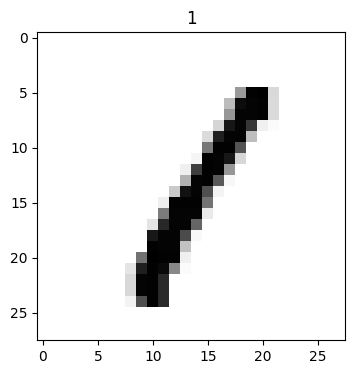

In [12]:
import matplotlib.pyplot as plt

n = 3
ttl = str(y_train[n])
plt.figure(figsize=(6, 4))
plt.title(ttl)
plt.imshow(x_train[n], cmap='Greys')

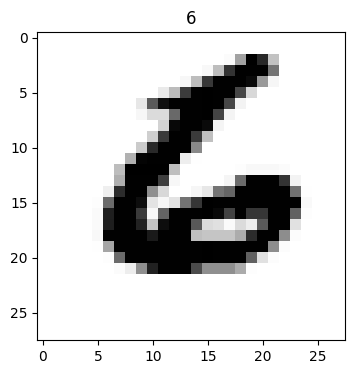

In [13]:
n = len(y_test)-1
ttl = str(y_test[n])
plt.figure(figsize=(6, 4))
plt.title(ttl)
plt.imshow(x_test[n], cmap='Greys')

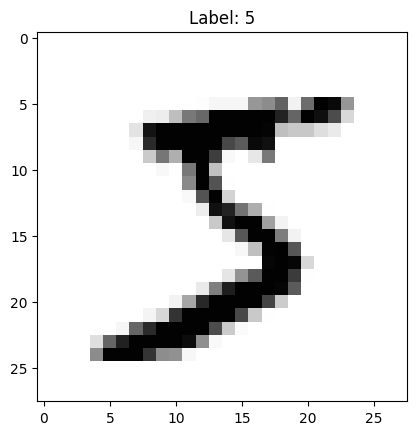

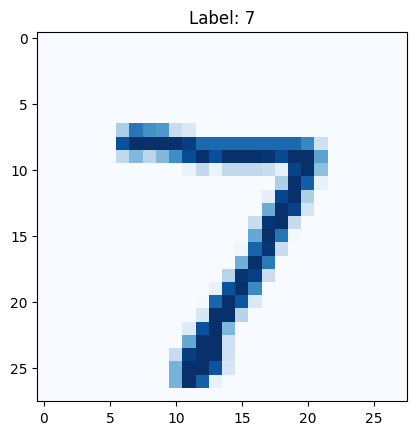

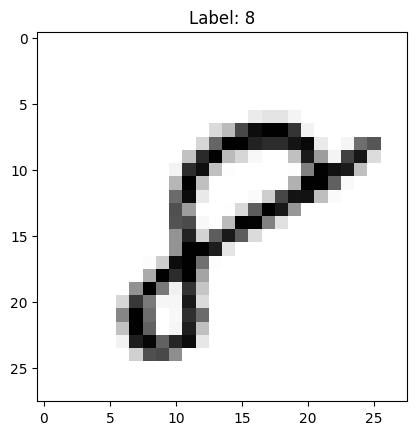

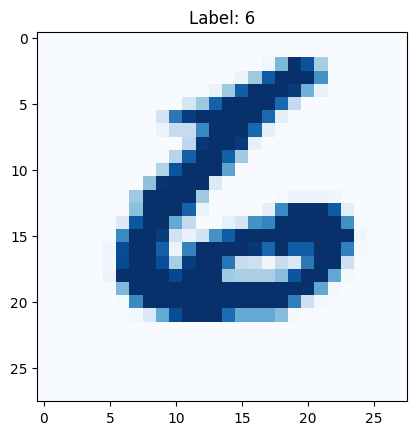

In [14]:
###############################################
# MNIST 데이터(훈련, 테스트)의 내부 첫 내용을 그려보자.
import matplotlib.pyplot as plt

tmp = "Label: " + str(y_train[0])
plt.title(tmp)
plt.imshow(x_train[0], cmap="Greys")
plt.show()

tmp = "Label: " + str(y_test[0])
plt.title(tmp)
plt.imshow(x_test[0], cmap='Blues')
plt.show()

# MNIST 데이터(훈련, 테스트)의 내부 마지막 내용을 그려보자.
idx = len(x_train) - 1
tmp = "Label: " + str(y_train[idx])
plt.title(tmp)
plt.imshow(x_train[idx], cmap="Greys")
plt.show()

idx = len(x_test) - 1
tmp = "Label: " + str(y_test[idx])
plt.title(tmp)
plt.imshow(x_test[idx], cmap='Blues')
plt.show()
###############################################

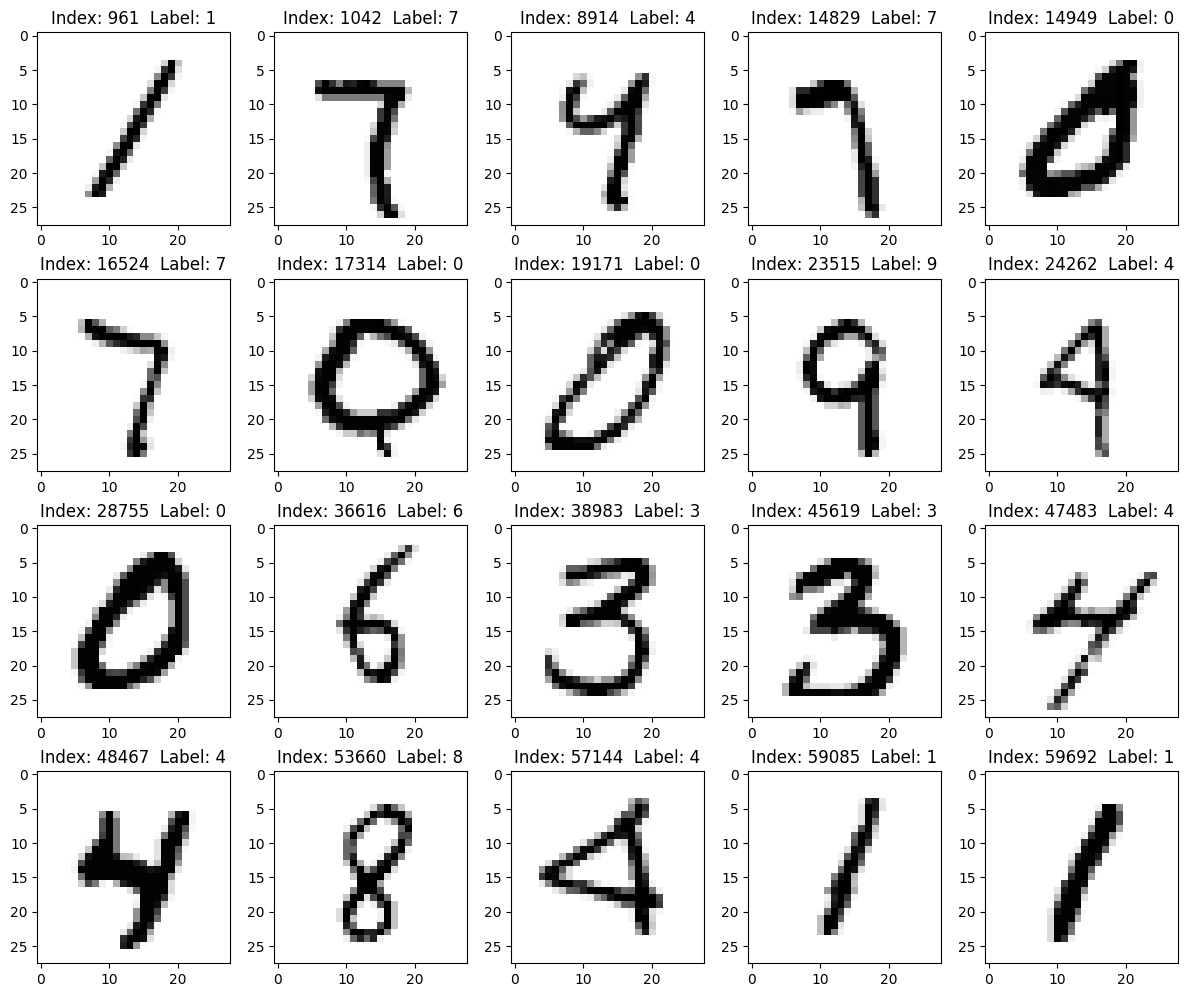

In [15]:
###############################################
#랜덤하게 20개의 훈련용 자료를 그려 보자.
from random import sample

nrows, ncols = 4, 5 #출력 가로 세로 수
idx = sorted(sample(range(len(x_train)), nrows * ncols)) # 출력할 첨자 선정
#print(idx)

count = 0
plt.figure(figsize=(12, 10))

for n in idx:
    count += 1
    plt.subplot(nrows, ncols, count)
    tmp = "Index: " + str(n) + "  Label: " + str(y_train[n])
    plt.title(tmp)
    plt.imshow(x_train[n], cmap='Greys')

plt.tight_layout()
plt.show()
###############################################